<a href="https://colab.research.google.com/github/adityap27/mnist-ann/blob/master/mnist_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.) Data Preprocessing**

In [0]:
# Data Preprocessing
from keras.datasets import mnist
 
# Importing the dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#flatten the images
X_train=X_train.reshape((X_train.shape[0],784))
X_test=X_test.reshape((X_test.shape[0],784))
y_train=y_train.reshape((y_train.shape[0],1)) #fixing shape
y_test=y_test.reshape((y_test.shape[0],1)) #fixing shape

#Encoding of categorical data to one-hot format
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(sparse=False)
y_train=onehotencoder.fit_transform(y_train)
y_test=onehotencoder.transform(y_test)

# Splitting the Training into the Training set and Validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.175, random_state = 0)

#Feature Scaling
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

Using TensorFlow backend.


# **2.) Build and Train ANN**

In [0]:
#ANN

#import libraries
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,BatchNormalization

In [0]:
#Build ANN model
model=Sequential()
model.add(Dense(256,kernel_initializer='he_normal',input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(256,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(10,activation='softmax',kernel_initializer='glorot_normal'))

#Compiling model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [0]:
#Training model
history=model.fit(X_train,y_train,epochs=150,batch_size=512,validation_data=(X_val,y_val),verbose=2,use_multiprocessing=True)

Train on 49500 samples, validate on 10500 samples
Epoch 1/150
 - 1s - loss: 0.7091 - accuracy: 0.7776 - val_loss: 0.2229 - val_accuracy: 0.9326
Epoch 2/150
 - 1s - loss: 0.2741 - accuracy: 0.9191 - val_loss: 0.1526 - val_accuracy: 0.9538
Epoch 3/150
 - 1s - loss: 0.2042 - accuracy: 0.9410 - val_loss: 0.1261 - val_accuracy: 0.9621
Epoch 4/150
 - 1s - loss: 0.1684 - accuracy: 0.9493 - val_loss: 0.1071 - val_accuracy: 0.9675
Epoch 5/150
 - 1s - loss: 0.1452 - accuracy: 0.9561 - val_loss: 0.0985 - val_accuracy: 0.9705
Epoch 6/150
 - 1s - loss: 0.1256 - accuracy: 0.9631 - val_loss: 0.0925 - val_accuracy: 0.9719
Epoch 7/150
 - 1s - loss: 0.1146 - accuracy: 0.9656 - val_loss: 0.0858 - val_accuracy: 0.9743
Epoch 8/150
 - 1s - loss: 0.1031 - accuracy: 0.9687 - val_loss: 0.0809 - val_accuracy: 0.9757
Epoch 9/150
 - 1s - loss: 0.0941 - accuracy: 0.9713 - val_loss: 0.0771 - val_accuracy: 0.9763
Epoch 10/150
 - 1s - loss: 0.0869 - accuracy: 0.9732 - val_loss: 0.0723 - val_accuracy: 0.9785
Epoch 11/

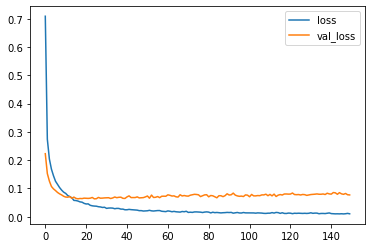

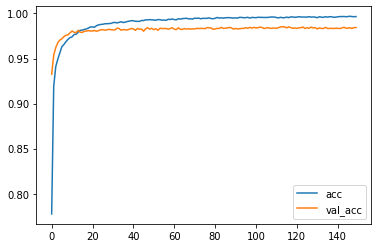

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [0]:
train=model.evaluate(X_train,y_train)
print(train)

49500/49500 [==============================] - 4s 86us/step
[0.00023556755931090402, 1.0]


In [0]:
val=model.evaluate(X_val,y_val)
print(val)

10500/10500 [==============================] - 1s 87us/step
[0.07706455891983031, 0.9842857122421265]


In [0]:
print(100*(1-train[1]))
print(100*(train[1]-val[1]))#After tuning.....the measure of "variance" wasn't reducing after...~~ 1.5%

0.0
1.5714287757873535


In [0]:
model.save('mnist-ann.model')

# **3.) Evaluation on Test set**

In [0]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 85us/step


[0.08582737032464338, 0.9842000007629395]